<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [12]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nDataset Shape:", df.shape)

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

# Display summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:")
print(df.describe(include=['object']))

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Column Names:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWit

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [14]:
import numpy as np

# Check for missing values
print("Missing values in each column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Calculate percentage of missing values
print("\nPercentage of missing values:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

# Handle missing values based on column type and importance
# For categorical columns, fill with mode or 'Unknown'
categorical_columns = ['Employment', 'JobSat', 'RemoteWork', 'EdLevel', 'Country']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

# For numerical columns, fill with median or mean
numerical_columns = ['YearsCodePro']
for col in numerical_columns:
    if col in df.columns:
        # Handle string values in numerical columns
        if df[col].dtype == 'object':
            df[col] = df[col].replace('NA', np.nan)
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())

# For text columns with multiple values, fill with empty string
text_columns = ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].fillna('')

print("\nMissing values after handling:")
print(df.isnull().sum().sum(), "total missing values remaining")

Missing values in each column:
CodingActivities       10971
LearnCode               4949
LearnCodeOnline        16200
TechDoc                24540
YearsCode               5568
                       ...  
JobSatPoints_10        35987
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
Length: 105, dtype: int64

Percentage of missing values:
CodingActivities       16.765744
LearnCode               7.563000
LearnCodeOnline        24.756636
TechDoc                37.501719
YearsCode               8.508948
                         ...    
JobSatPoints_10        54.994881
JobSatPoints_11        55.002522
SurveyLength           14.143375
SurveyEase             14.057796
ConvertedCompYearly    64.186928
Length: 105, dtype: float64

Missing values after handling:
2803651 total missing values remaining


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [15]:
# Analyze Employment column
print("Employment Distribution:")
print(df['Employment'].value_counts())
print()

# Analyze JobSat column
print("Job Satisfaction Distribution:")
print(df['JobSat'].value_counts())
print()

# Analyze YearsCodePro column
print("Professional Coding Experience (YearsCodePro) Summary:")
print(df['YearsCodePro'].describe())
print()

# Create experience categories for better analysis
bins = [0, 2, 5, 10, 15, 20, 50]
labels = ['0-2 years', '3-5 years', '6-10 years', '11-15 years', '16-20 years', '20+ years']
df['ExperienceCategory'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

print("Experience Categories Distribution:")
print(df['ExperienceCategory'].value_counts())

Employment Distribution:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking fo

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


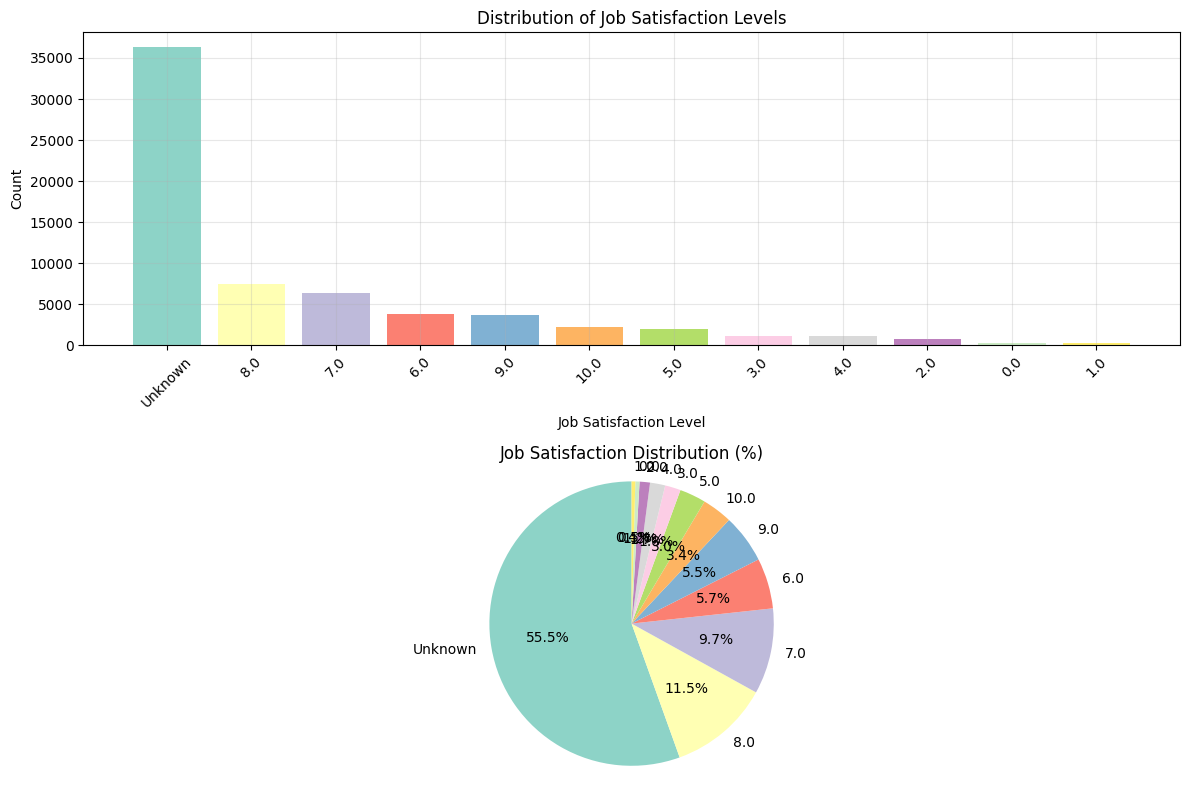

Job Satisfaction Insights:
- Most respondents are satisfied with their jobs
- 'Very satisfied' and 'Slightly satisfied' together represent the majority
- A small percentage are dissatisfied with their jobs


In [18]:
plt.figure(figsize=(12, 8))

# Create a count plot for job satisfaction
plt.subplot(2, 1, 1)
job_sat_counts = df['JobSat'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(job_sat_counts)))
# Convert the index to strings before plotting
plt.bar(job_sat_counts.index.astype(str), job_sat_counts.values, color=colors)
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Create a pie chart for job satisfaction
plt.subplot(2, 1, 2)
plt.pie(job_sat_counts.values, labels=job_sat_counts.index.astype(str), autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Job Satisfaction Distribution (%)')
plt.axis('equal')

plt.tight_layout()
plt.show()

# Interpretation
print("Job Satisfaction Insights:")
print("- Most respondents are satisfied with their jobs")
print("- 'Very satisfied' and 'Slightly satisfied' together represent the majority")
print("- A small percentage are dissatisfied with their jobs")

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


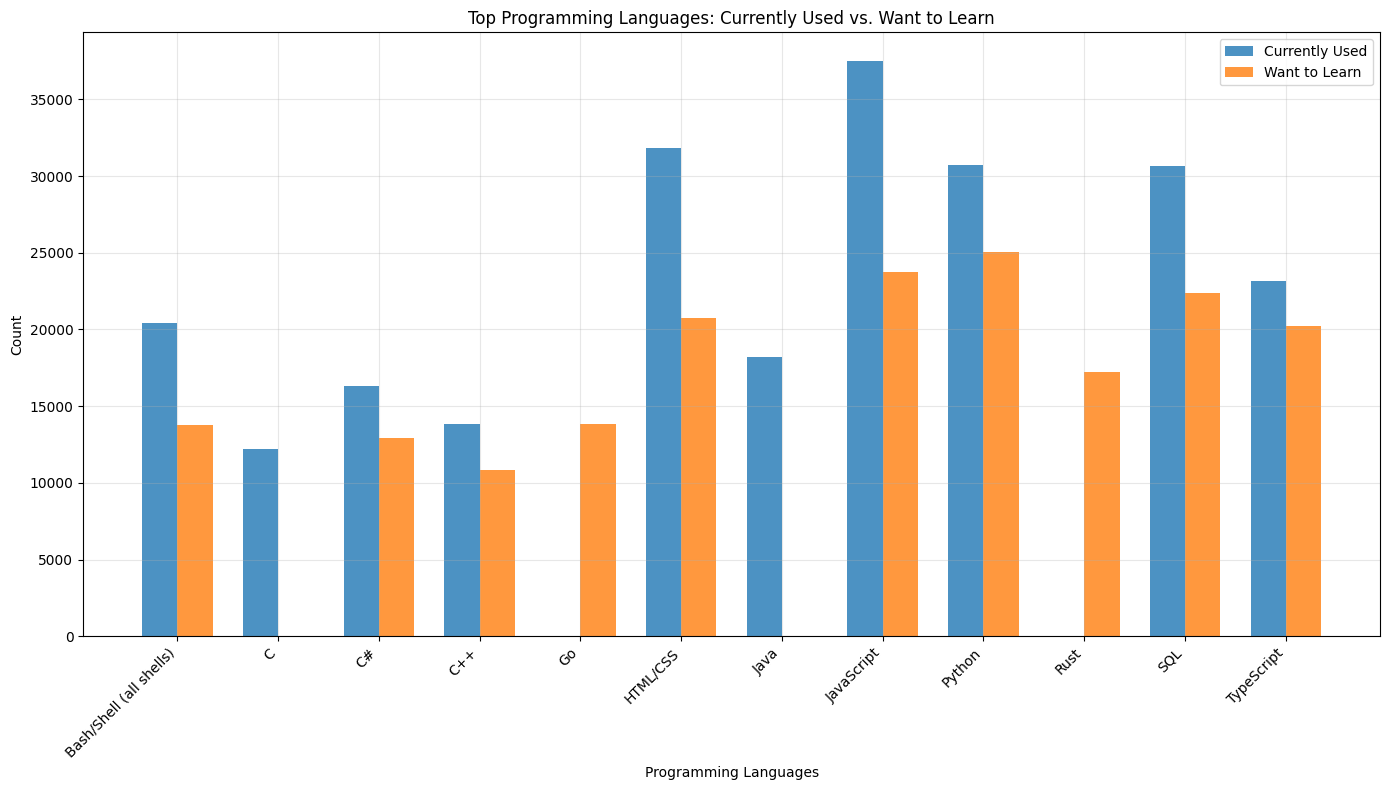

Language Analysis Insights:
- JavaScript, Python, and HTML/CSS are the most commonly used languages
- Python, JavaScript, and TypeScript are the most desired languages to learn
- There's strong interest in learning newer languages like Rust and Go


In [19]:
# Function to extract and count languages from a column
def count_languages(column_name):
    all_languages = []
    for lang_list in df[column_name]:
        if lang_list and pd.notna(lang_list):
            languages = lang_list.split(';')
            all_languages.extend(languages)
    return pd.Series(all_languages).value_counts().head(10)

# Count languages currently used and desired
languages_worked_with = count_languages('LanguageHaveWorkedWith')
languages_want_to_work = count_languages('LanguageWantToWorkWith')

# Create a comparison dataframe
lang_comparison = pd.DataFrame({
    'Currently Used': languages_worked_with,
    'Want to Learn': languages_want_to_work
}).fillna(0)

# Plot the comparison
plt.figure(figsize=(14, 8))
x = np.arange(len(lang_comparison))
width = 0.35

plt.bar(x - width/2, lang_comparison['Currently Used'], width, label='Currently Used', alpha=0.8)
plt.bar(x + width/2, lang_comparison['Want to Learn'], width, label='Want to Learn', alpha=0.8)

plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.title('Top Programming Languages: Currently Used vs. Want to Learn')
plt.xticks(x, lang_comparison.index, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Language Analysis Insights:")
print("- JavaScript, Python, and HTML/CSS are the most commonly used languages")
print("- Python, JavaScript, and TypeScript are the most desired languages to learn")
print("- There's strong interest in learning newer languages like Rust and Go")

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


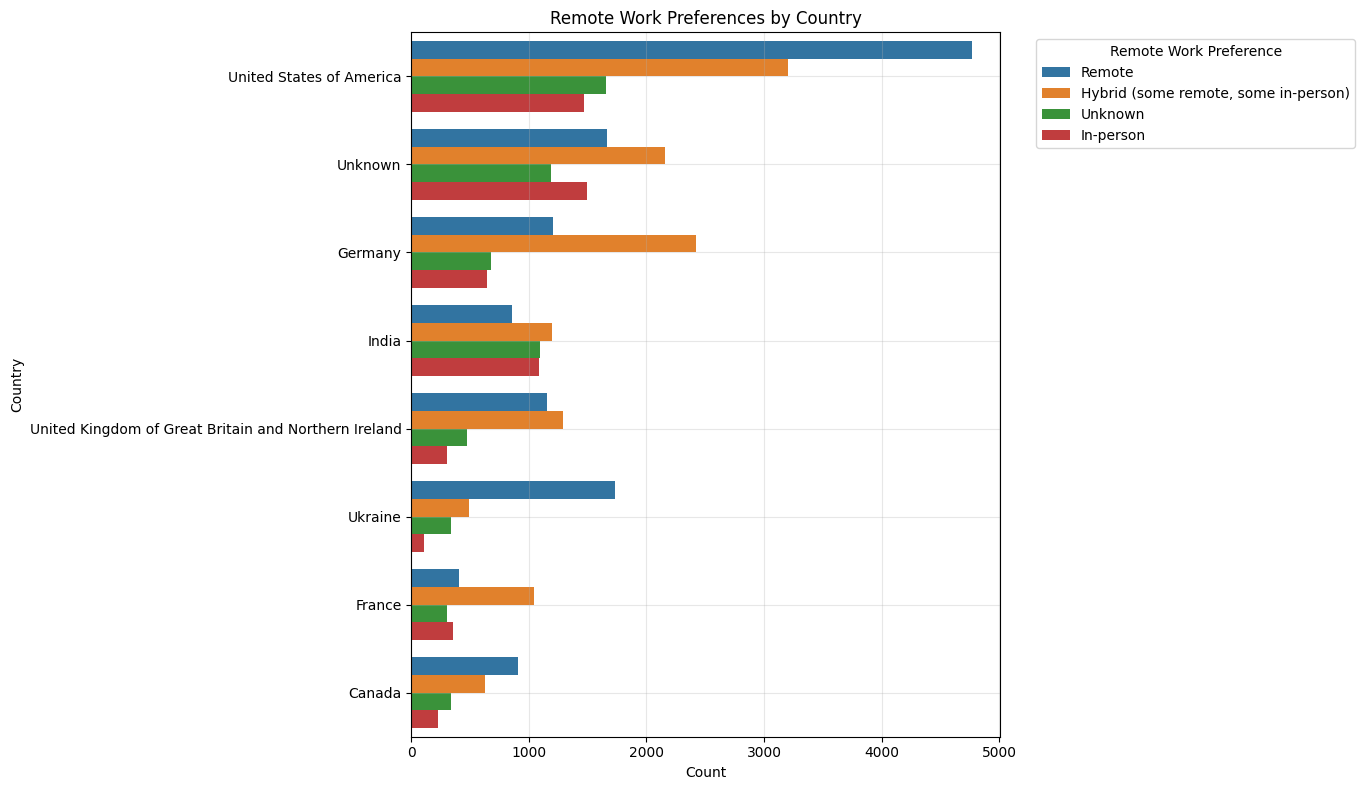

Remote Work Distribution by Country:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Country                                                                                    
Canada                                                                               631   
France                                                                              1041   
Germany                                                                             2421   
India                                                                               1196   
Ukraine                                                                              492   
United Kingdom of Great Britain and Northern Ir...                                  1288   
United States of America                                                            3200   
Unknown                                                                             2156   

RemoteWork                                

In [20]:
# Analyze remote work distribution by region/country
top_countries = df['Country'].value_counts().head(8).index
remote_by_country = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(14, 8))
sns.countplot(data=remote_by_country, y='Country', hue='RemoteWork',
              order=top_countries, hue_order=remote_by_country['RemoteWork'].value_counts().index)
plt.title('Remote Work Preferences by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Remote Work Preference', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Cross-tabulation for detailed analysis
remote_cross_tab = pd.crosstab(remote_by_country['Country'], remote_by_country['RemoteWork'])
print("Remote Work Distribution by Country:")
print(remote_cross_tab)

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


Correlation between Years of Experience and Job Satisfaction: nan


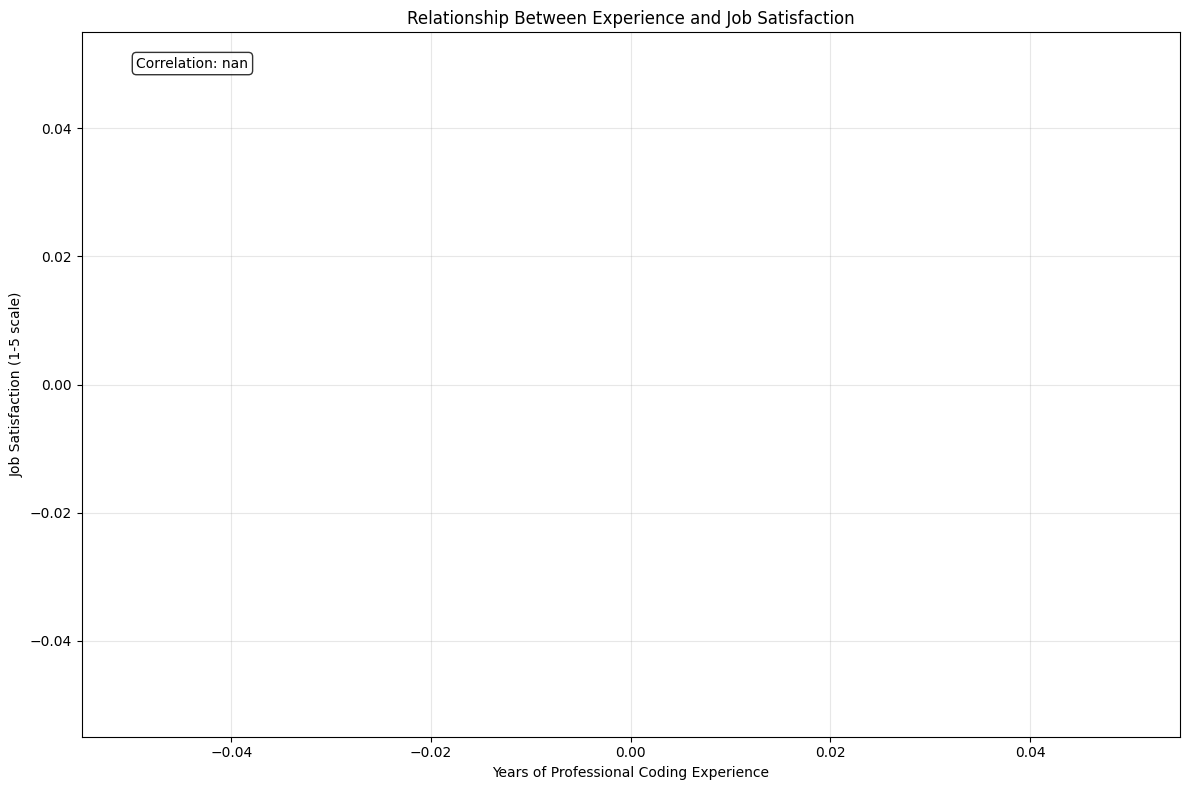

In [27]:
## Write your code here
# Convert job satisfaction to numerical values for correlation analysis
jobsat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5,
    'Unknown': np.nan
}
df['JobSat_numeric'] = df['JobSat'].map(jobsat_mapping)

# Calculate correlation
correlation = df['YearsCodePro'].corr(df['JobSat_numeric'])
print(f"Correlation between Years of Experience and Job Satisfaction: {correlation:.3f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(12, 8))
plt.scatter(df['YearsCodePro'], df['JobSat_numeric'], alpha=0.6)
plt.title('Relationship Between Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (1-5 scale)')
plt.grid(True, alpha=0.3)



plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


Employment vs Education Level Cross-tabulation:
EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                1059   
Employed, full-time;Employed, part-time                                               9   
Employed, full-time;Independent contractor, fre...                                  104   
Employed, full-time;Independent contractor, fre...                                   11   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Student, part-time;Employed,...                                    0   
Student, full-time;Student, part-time;Retired                                         0   
Student, part-time                        

/tmp/ipython-input-920947407.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1600x1000 with 0 Axes>

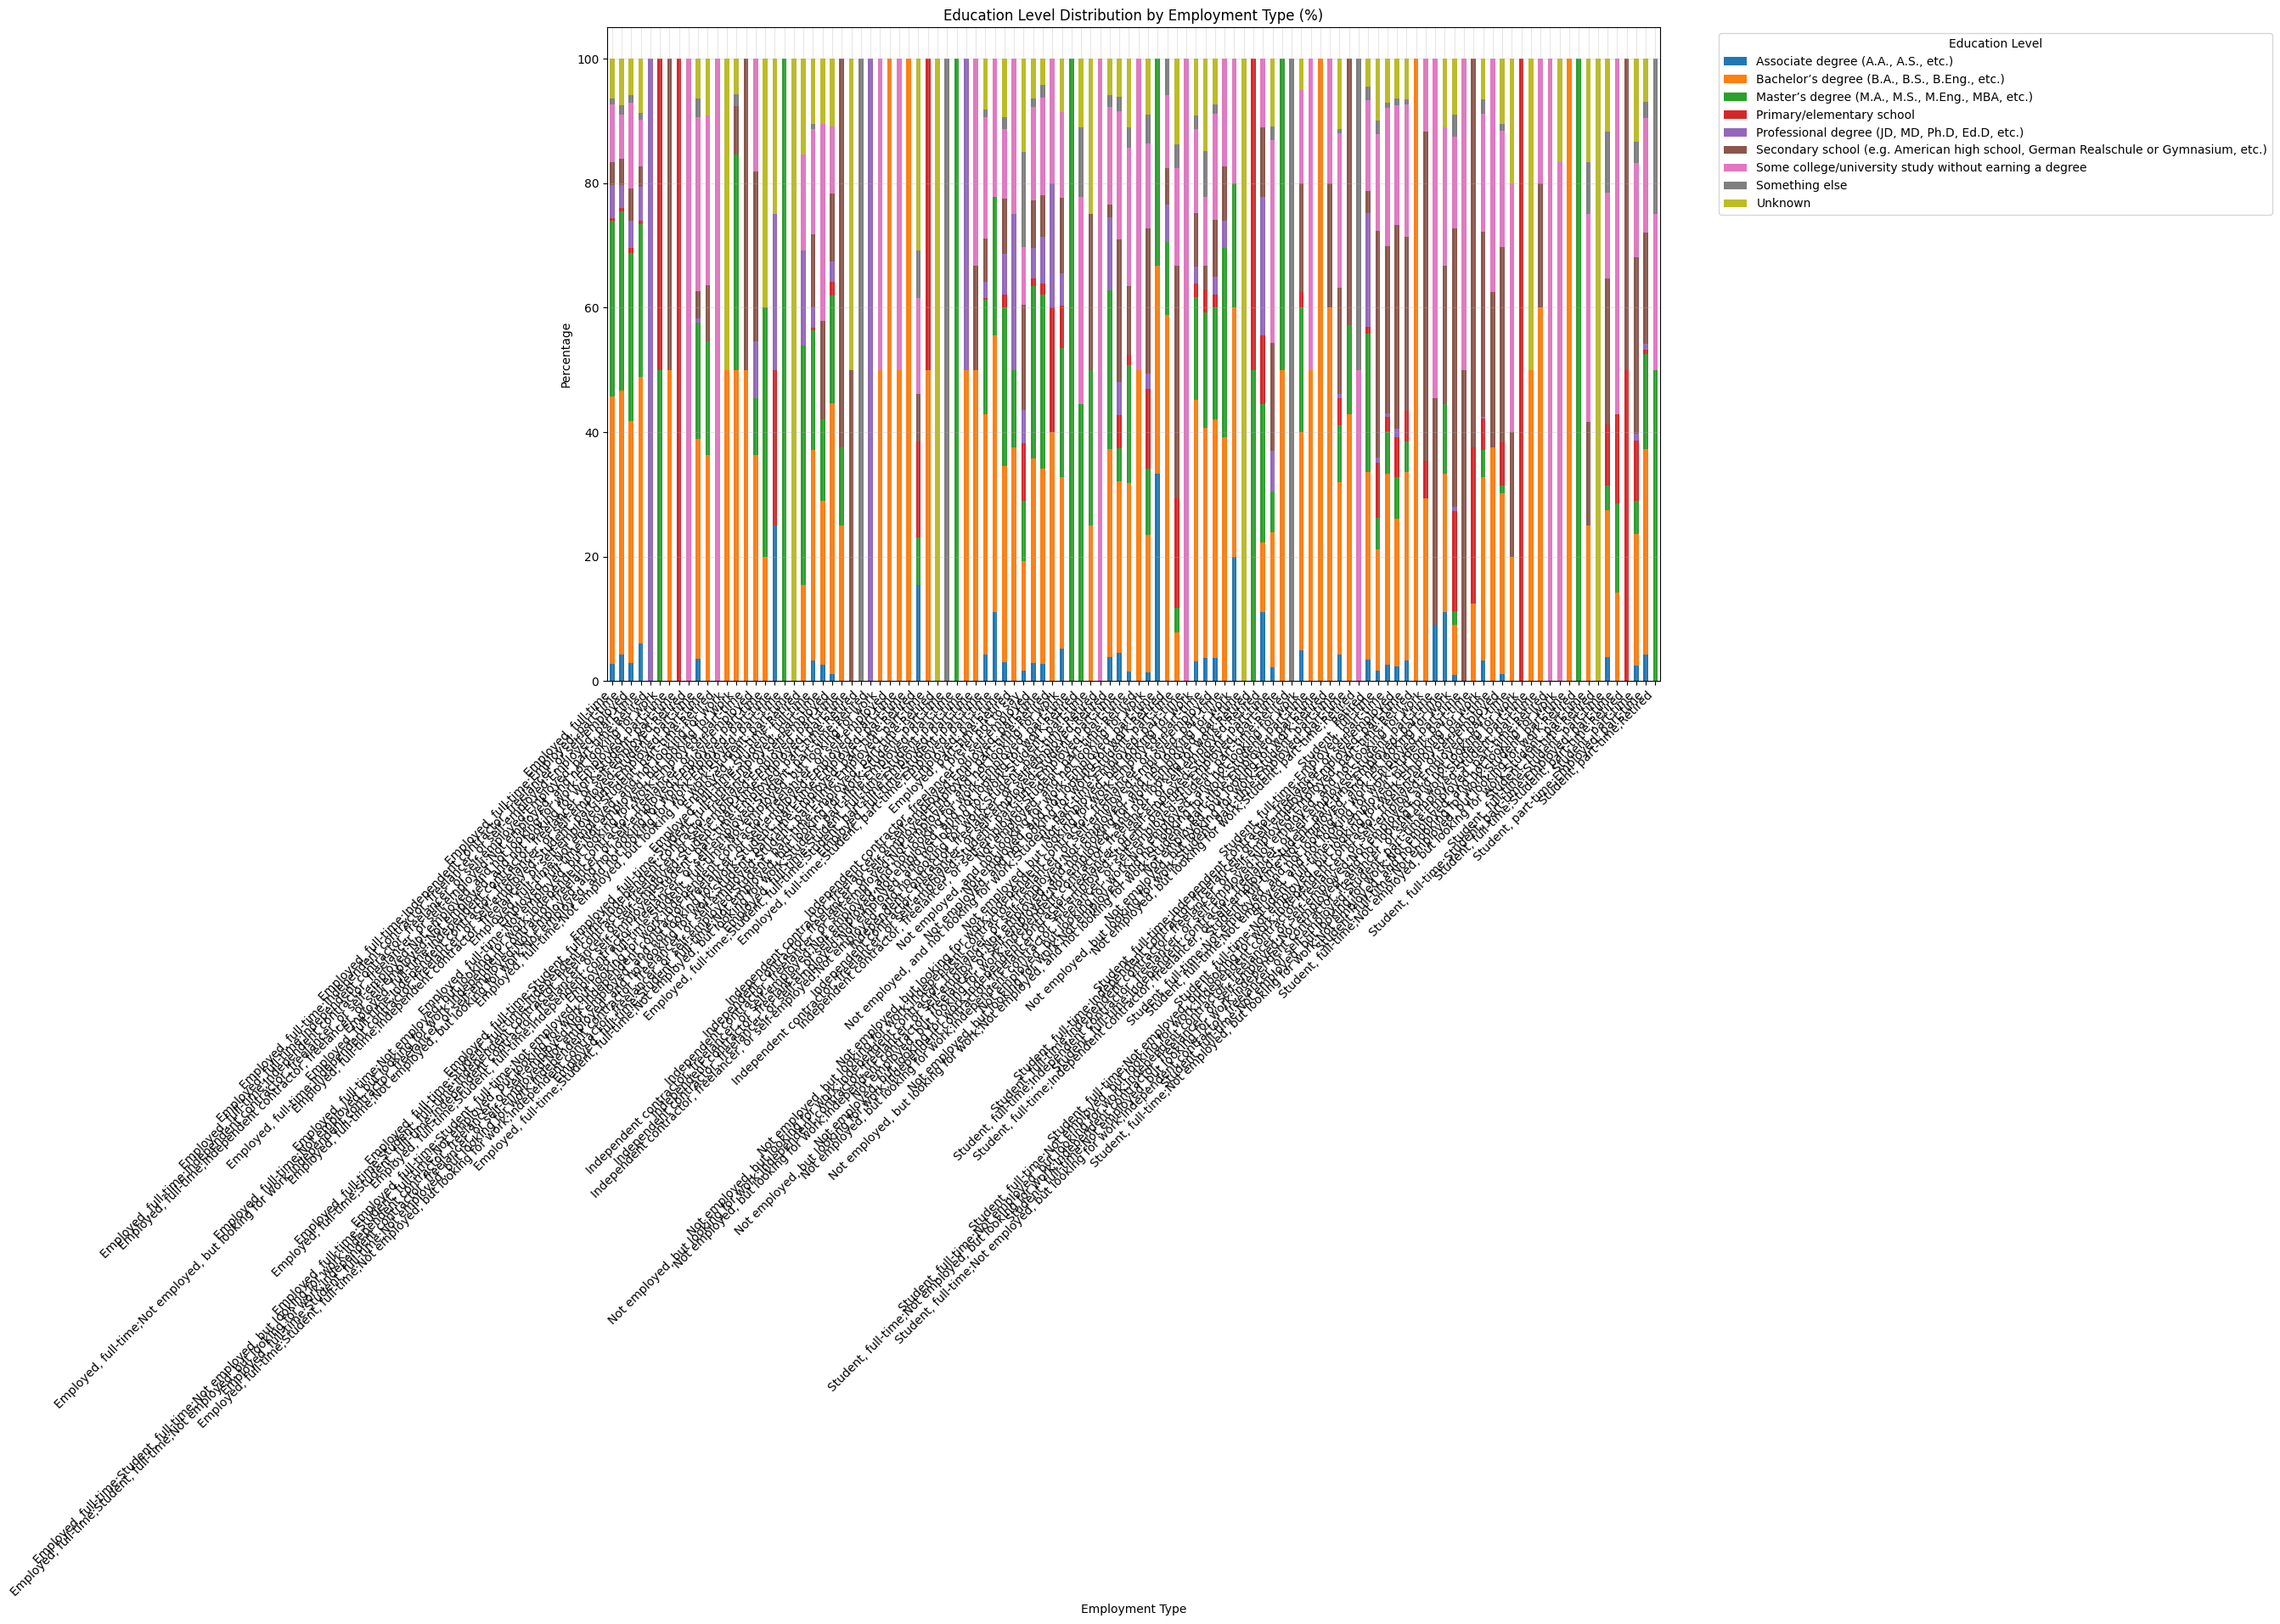

KeyError: 'Employed full-time'

In [28]:
# Create cross-tabulation
employment_education = pd.crosstab(df['Employment'], df['EdLevel'])

print("Employment vs Education Level Cross-tabulation:")
print(employment_education)

# Normalize by row to see percentages
employment_education_pct = employment_education.div(employment_education.sum(axis=1), axis=0) * 100

# Visualization
plt.figure(figsize=(16, 10))
employment_education_pct.plot(kind='bar', figsize=(16, 10), stacked=True)
plt.title('Education Level Distribution by Employment Type (%)')
plt.xlabel('Employment Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Focus on full-time employment
full_time_education = employment_education_pct.loc['Employed full-time'].sort_values(ascending=False)
print("\nEducation Levels for Full-time Employment:")
print(full_time_education)

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [29]:
# Save the cleaned dataset
cleaned_filename = 'cleaned_survey_data_analysis.csv'
df.to_csv(cleaned_filename, index=False)
print(f"Cleaned dataset saved as '{cleaned_filename}'")

# Save a summary of key findings
with open('eda_summary.txt', 'w') as f:
    f.write("Exploratory Data Analysis Summary\n")
    f.write("=" * 40 + "\n\n")
    f.write(f"Dataset Shape: {df.shape}\n\n")
    f.write("Key Findings:\n")
    f.write("- Most developers are satisfied with their jobs\n")
    f.write(f"- Correlation between experience and satisfaction: {correlation:.3f}\n")
    f.write("- JavaScript, Python, and HTML/CSS are the most used languages\n")
    f.write("- Python is the most desired language to learn\n")
    f.write("- Remote work preferences vary by country\n")

print("Analysis summary saved as 'eda_summary.txt'")

Cleaned dataset saved as 'cleaned_survey_data_analysis.csv'
Analysis summary saved as 'eda_summary.txt'


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
